In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, validation_curve, cross_val_score, StratifiedShuffleSplit, StratifiedKFold

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df.shape

(300000, 8)

In [4]:
df.columns

Index(['url_length', 'num_subdomains', 'has_https', 'num_hyphens',
       'num_special_chars', 'has_suspicious_keyword', 'num_external_links',
       'label'],
      dtype='object')

In [5]:
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic', eval_metric='logloss', random_state=42)

In [7]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
y_pred = xgb_model.predict(X_test)

In [13]:
recall, f1 = recall_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f"Recall for phishing class: {recall:.4f}", f"F1 Score: {f1:.4f}")


Recall for phishing class: 0.9195 F1 Score: 0.9122


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Phishing']))


Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      0.90      0.91     45099
    Phishing       0.91      0.92      0.91     44901

    accuracy                           0.91     90000
   macro avg       0.91      0.91      0.91     90000
weighted avg       0.91      0.91      0.91     90000



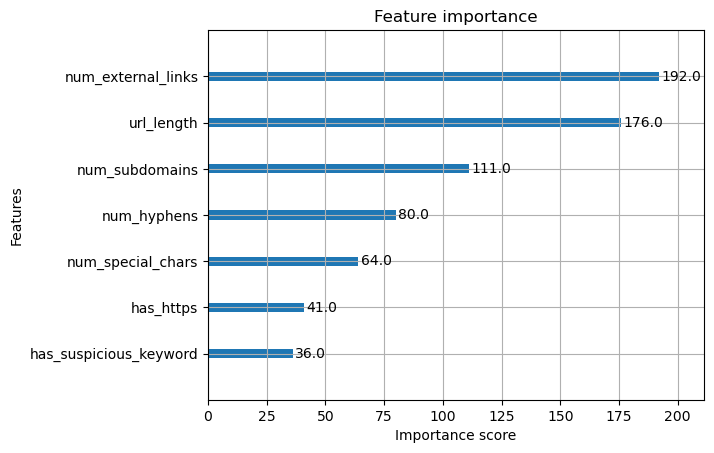

In [14]:
xgb.plot_importance(xgb_model)
plt.show()